In [1]:
import string
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import codecs
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import MWETokenizer

#nltk.download('punkt')

#install wordcloud
#!pip install wordcloud

In [2]:
df = pd.read_csv("top100-genre-tags.csv", index_col=0)

In [70]:
#df['tags'] is a pandas series; combine all rows
all_tags = df['tags'].str.cat(sep='\', ')
all_tags = all_tags.replace("\'","").replace(", ",";").replace(" ","")

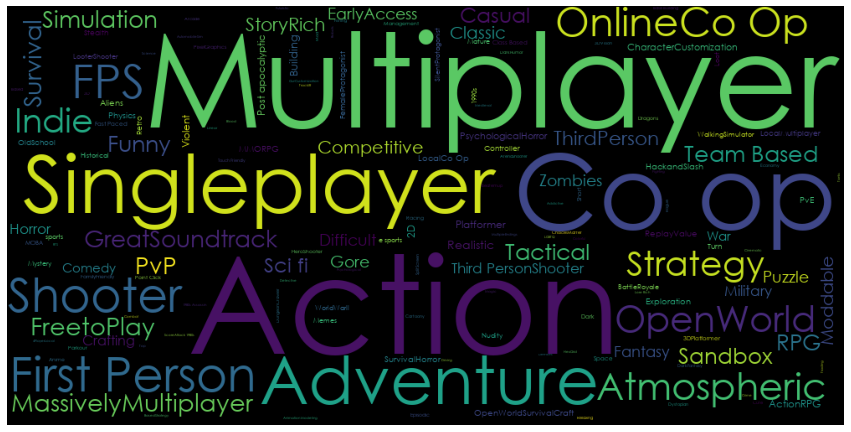

In [75]:
font_path = 'C:\Windows\Fonts\Gothic.TTF'
wordcloud = WordCloud(width = 1000, height = 500, font_path=font_path).generate(all_tags)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tag_cloud"+".png", bbox_inches='tight', dpi = 300)
plt.show()

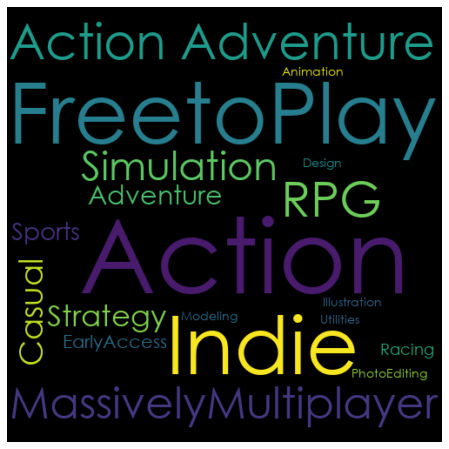

In [67]:
#do the same for genre
all_genre = df['genre'].str.cat(sep=', ')
all_genre = all_genre.replace("\'","").replace(", ",";").replace(" ", "")

font_path = 'C:\Windows\Fonts\Gothic.TTF'
wordcloud = WordCloud(width = 500, height = 500, font_path=font_path).generate(all_genre)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.savefig("genre_cloud"+".png", bbox_inches='tight', dpi = 300)
plt.show()

In [72]:
words = nltk.word_tokenize(all_tags)

fdist = nltk.FreqDist(words)

word_dict = {}
for word, frequency in fdist.most_common(50):
    if len(word) > 2:
        word_dict[word] = frequency
    
word_dict

{'Action': 88,
 'Multiplayer': 83,
 'Co-op': 68,
 'Singleplayer': 66,
 'Adventure': 61,
 'First-Person': 57,
 'Shooter': 56,
 'FPS': 54,
 'OnlineCo-Op': 44,
 'Atmospheric': 41,
 'OpenWorld': 40,
 'Strategy': 37,
 'Indie': 36,
 'MassivelyMultiplayer': 36,
 'FreetoPlay': 35,
 'Survival': 34,
 'Simulation': 31,
 'PvP': 30,
 'GreatSoundtrack': 29,
 'Team-Based': 27,
 'Tactical': 27,
 'Funny': 27,
 'RPG': 26,
 'Sandbox': 25,
 'Casual': 24,
 'Sci-fi': 22,
 'ThirdPerson': 21,
 'StoryRich': 20,
 'Competitive': 19,
 'Moddable': 19,
 'Classic': 18,
 'Zombies': 17,
 'Difficult': 17,
 'Gore': 17,
 'EarlyAccess': 17,
 'Fantasy': 16,
 'Military': 15,
 'Third-PersonShooter': 15,
 'Horror': 15,
 'Crafting': 14,
 'Puzzle': 14,
 'War': 13,
 'Comedy': 13,
 'Realistic': 12,
 'Building': 11,
 'Violent': 10,
 'ActionRPG': 10}

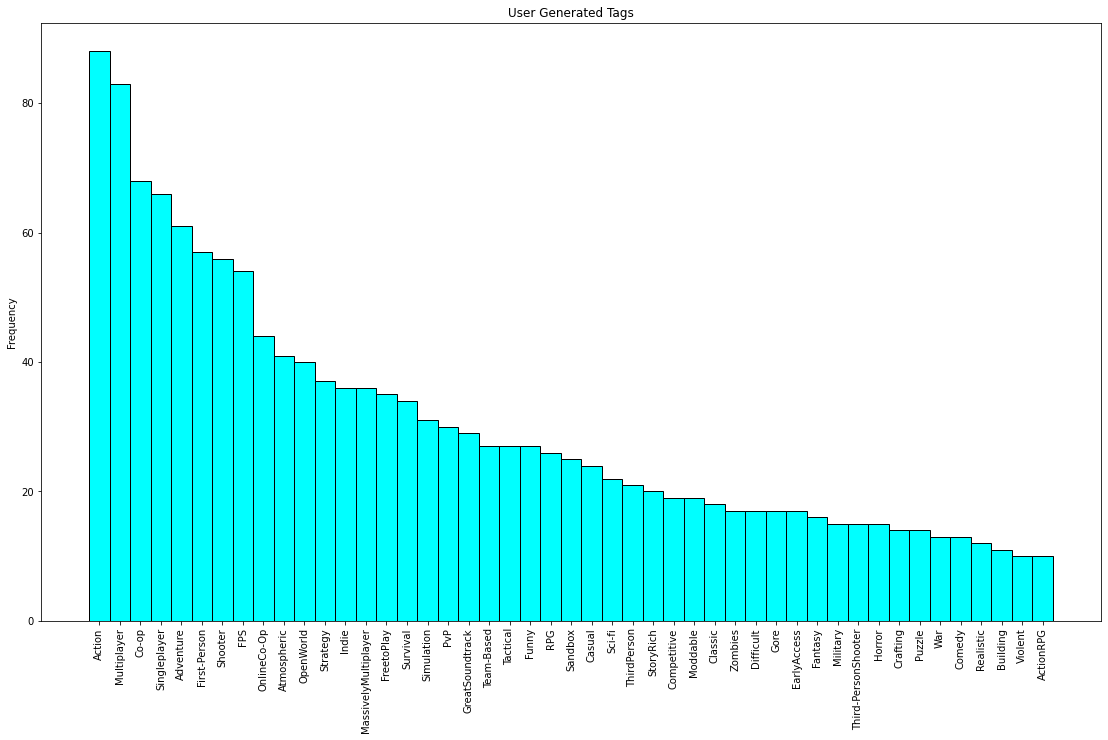

In [73]:
plt.bar(word_dict.keys(), word_dict.values(), width = 1, edgecolor = "black", color = "cyan")
plt.title("User Generated Tags")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
fig = plt.gcf()
fig.set_size_inches(19, 11)
plt.savefig("usertags"+".png", bbox_inches='tight', dpi = 300)
plt.show()

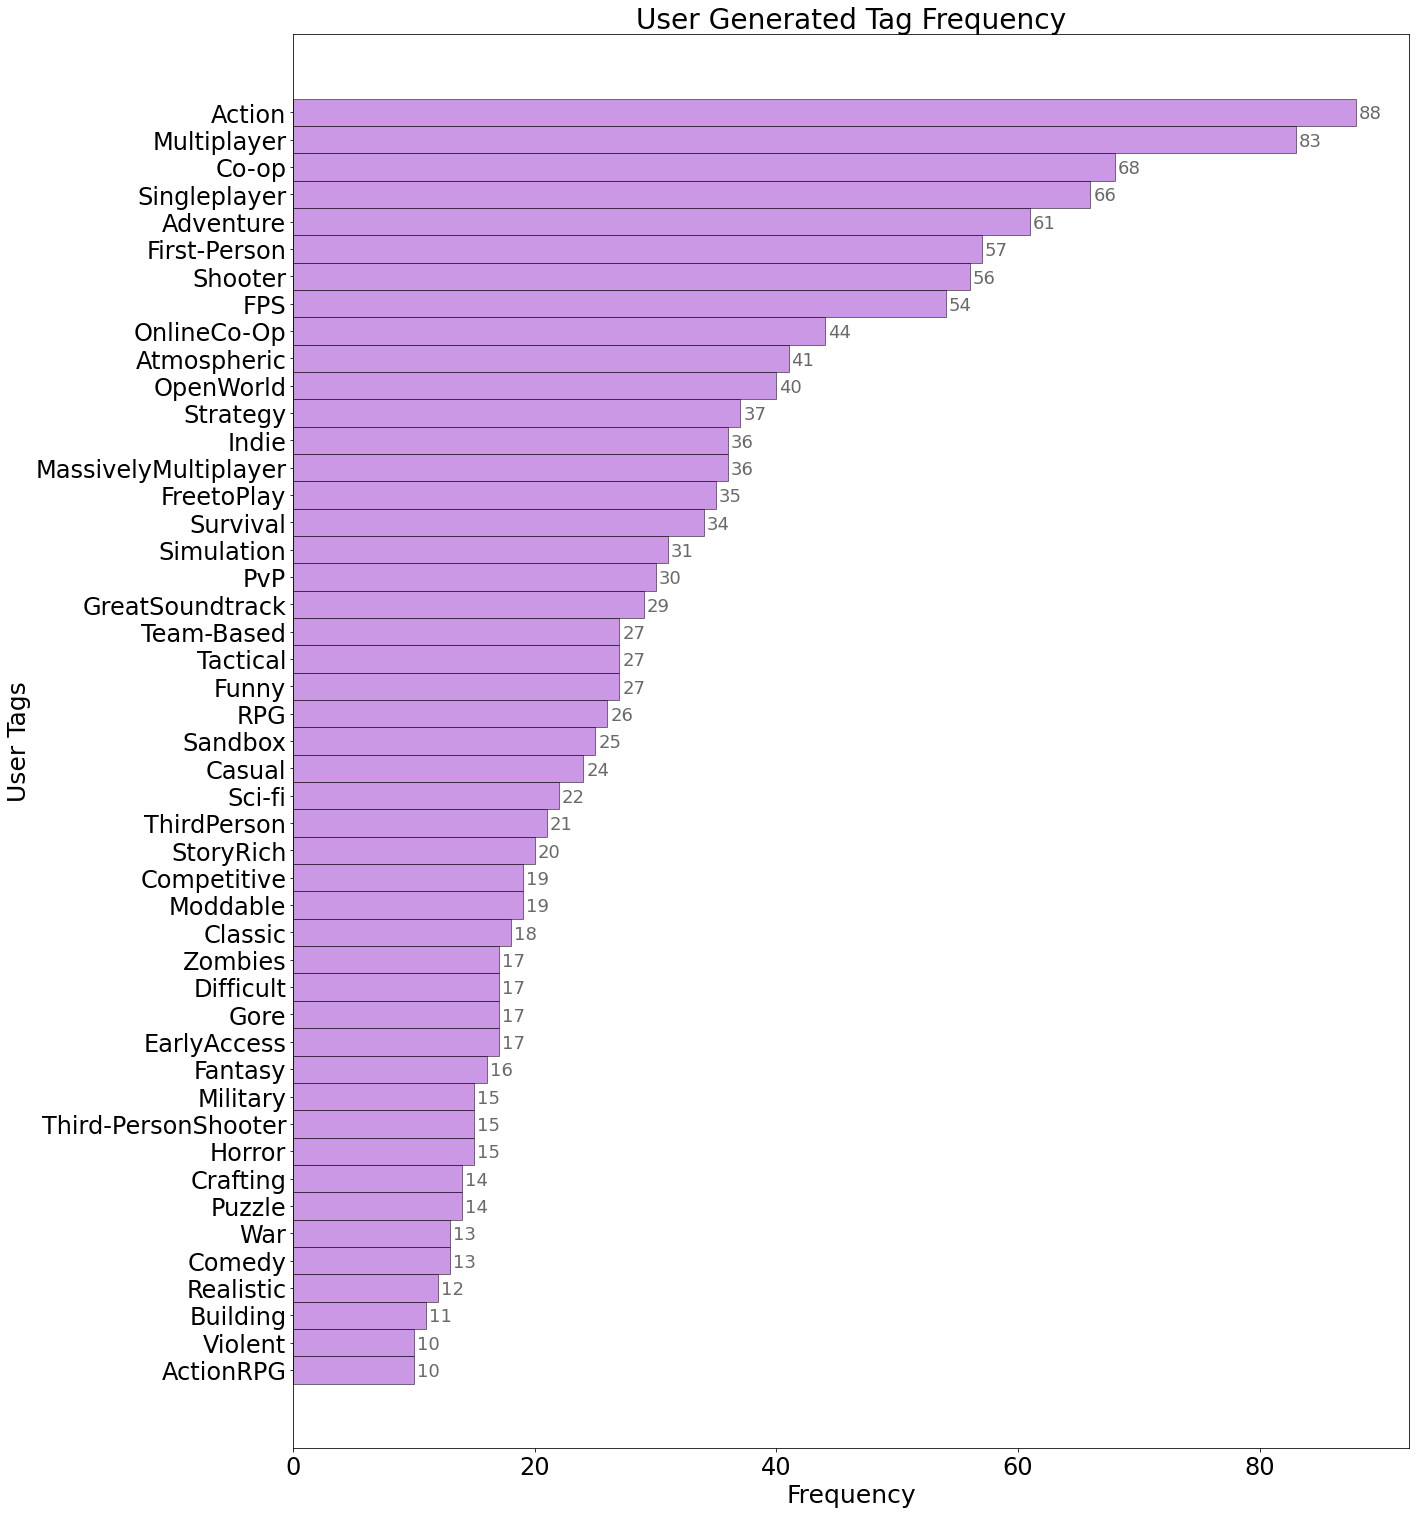

In [74]:
#horizontal bar graph is easier to visualize and understand

width = np.array(list(word_dict.values()))
tags = np.array(list(word_dict.keys()))
y_pos = np.arange(len(tags))

#tag_string = str(tags)
#tag_string = tag_string.replace("_", " ")
plt.barh(y_pos, width, height=1, color="darkorchid", alpha=0.5, edgecolor="black")
plt.yticks(y_pos, tags, fontsize=20)
#plt.xticks(y_pos, fontsize=15)
plt.title("User Generated Tag Frequency", fontsize = 28)
plt.xlabel("Frequency", fontsize=25)
plt.ylabel("User Tags", fontsize=25)
ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
ax.invert_yaxis()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
fig = plt.gcf()
fig.set_size_inches(20, 26)
for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize=18, color="dimgrey")
plt.savefig("usertags-hbar"+".png", bbox_inches='tight', dpi = 300)
plt.show()


In [68]:
words2 = nltk.word_tokenize(all_genre)

fdist2 = nltk.FreqDist(words2)

word_dict2 = {}
for word, frequency in fdist2.most_common(50):
    if len(word) > 2:
        word_dict2[word] = frequency

    
word_dict2

{'Action': 74,
 'FreetoPlay': 34,
 'Indie': 31,
 'Adventure': 30,
 'RPG': 22,
 'MassivelyMultiplayer': 21,
 'Simulation': 18,
 'Casual': 11,
 'Strategy': 9,
 'Sports': 6,
 'EarlyAccess': 3,
 'Racing': 2,
 'Animation': 1,
 'Modeling': 1,
 'Design': 1,
 'Illustration': 1,
 'PhotoEditing': 1,
 'Utilities': 1}

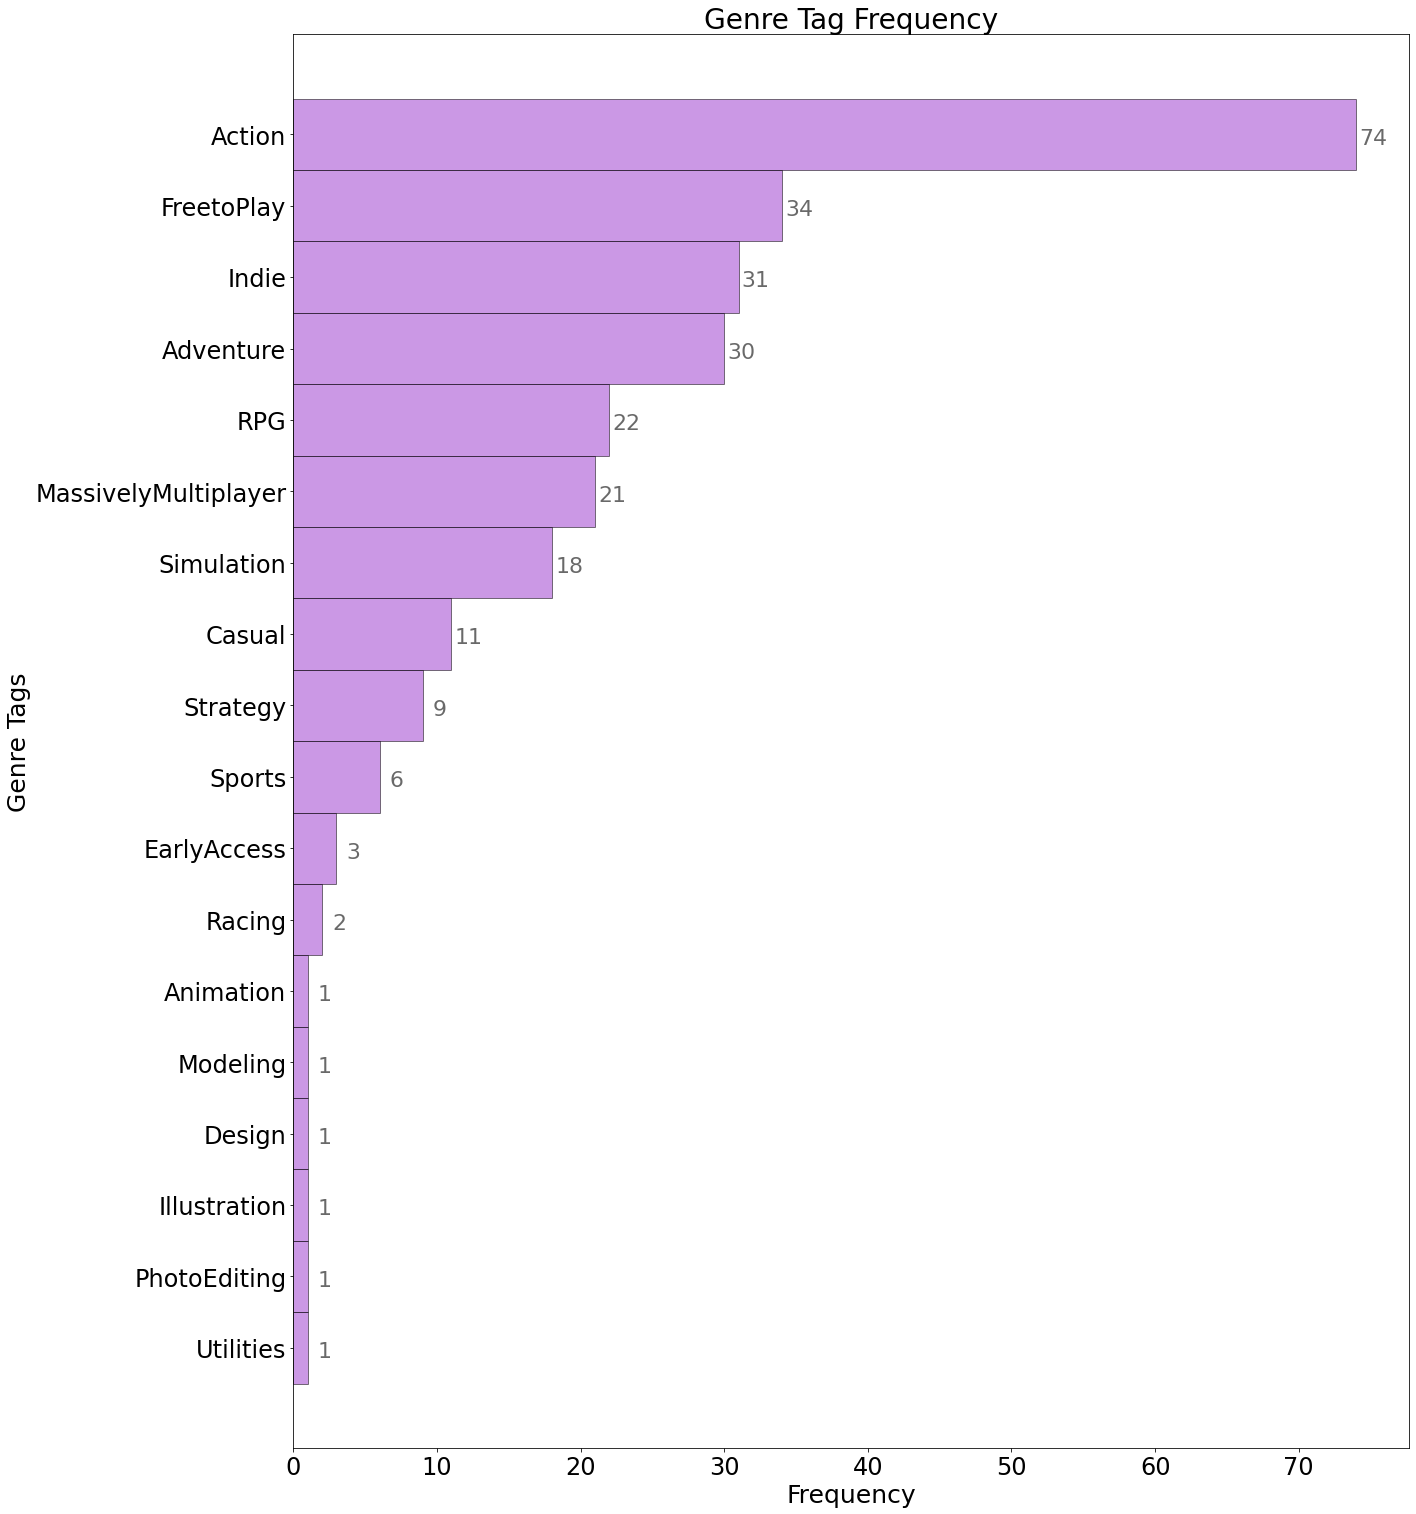

In [69]:
width2 = np.array(list(word_dict2.values()))
tags2 = np.array(list(word_dict2.keys()))
y_pos2 = np.arange(len(tags2))

plt.barh(y_pos2, width2, height=1, color="darkorchid", alpha=0.5, edgecolor="black")
plt.yticks(y_pos2, tags2, fontsize=20)
plt.title("Genre Tag Frequency", fontsize = 28)
plt.xlabel("Frequency", fontsize=25)
plt.ylabel("Genre Tags", fontsize=25)
ax = plt.gca()
ax.invert_yaxis()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
fig = plt.gcf()
fig.set_size_inches(20, 26)
for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize=22, color="dimgrey")
plt.savefig("genretags-hbar"+".png", bbox_inches='tight', dpi = 300)
plt.show()